### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2021 Semester 2

## Assignment 2

**Student Name:**    `YINGPENG TAN`

**Student ID:**     `739 674`

## This iPython notebook is a template which you should use for your Assignment 2 submission. This file should be submitted at the **Assignment 2: Code** link on the LMS.

In addition to this file, you should submit a writren report explaining your results at the **Assignment 2: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 2. Classification on the CIFAR-10 subset

In this problem, you will conduct classification on a subset of the CIFAR10 dataset. The dataset is generated in the following coding block (Please don't modify the following coding block).

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage 


(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

train_images_sub=np.zeros([250,32,32,3])
train_labels_sub=np.zeros([250,1])

test_images_sub=np.zeros([200,32,32,3])
test_labels_sub=np.zeros([200,1])

for clsi in range (10):
    idx=train_labels==clsi
    idx=np.squeeze(idx)
    imgs = train_images[idx,:,:,:]
    imgs = imgs[::200,:,:,:]
    train_images_sub[25*clsi:(clsi+1)*25,:,:,:] = imgs
    train_labels_sub[25*clsi:(clsi+1)*25,:] = clsi
    
    idx=test_labels==clsi
    idx=np.squeeze(idx)
    imgs = test_images[idx,:,:,:]
    imgs = imgs[::50,:,:,:]
    test_images_sub[20*clsi:(clsi+1)*20,:,:,:]=imgs
    test_labels_sub[20*clsi:(clsi+1)*20,:] = clsi
    

print("train_images shape:", train_images_sub.shape)
print("train_labels shape:", train_labels_sub.shape)
print("test_images shape:", test_images_sub.shape)
print("test_labels shape:", test_labels_sub.shape)



170508288/170498071 [==============================] - 4s 0us/step
train_images shape: (250, 32, 32, 3)
train_labels shape: (250, 1)
test_images shape: (200, 32, 32, 3)
test_labels shape: (200, 1)


1. Implement  the  CNN  shown  in  Q1  in  the  assignment specificication  and  use  it  to classify the provided dataset.  Plot the training accuracy and testing accuracy under different epochs. Please see the assignment specificication for more details of the training settings.

In [ ]:
# Implementaton of the CNN shown in Q1 in the assignment specificication

from tensorflow.keras import models
from tensorflow.keras.models import Model

# The Input Layer
inputs = layers.Input((32, 32, 3))

# Layer 1
layer1_convolutional = layers.Conv2D(32, (5, 5), activation='relu', padding='valid')(inputs)

# Layer 2, Sub 1
layer2_sub1_convolutional = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(layer1_convolutional)
# Layer 2, Sub 2
layer2_sub2_convolutional1 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(layer1_convolutional)
layer2_sub2_convolutional2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(layer2_sub2_convolutional1)
# Layer 2, Sub 3
layer2_sub3_maxpool = layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')(layer1_convolutional)
layer2_sub3_convolutional = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(layer2_sub3_maxpool)
# Layer 2, Concatenation by Channels
layer2_concatenation = layers.concatenate([layer2_sub1_convolutional, layer2_sub2_convolutional2, layer2_sub3_convolutional], axis = 3)

# Layer 3, Sub 1
layer3_sub1_convolutional = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(layer2_concatenation)
# Layer 3, Sub 2
layer3_sub2_convolutional1 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(layer2_concatenation)
layer3_sub2_convolutional2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(layer3_sub2_convolutional1)
# Layer 3, Sub 3
layer3_sub3_maxpool = layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')(layer2_concatenation)
layer3_sub3_convolutional = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(layer3_sub3_maxpool)
# Layer 3, Concatenation by Channels
layer3_concatenation = layers.concatenate([layer3_sub1_convolutional, layer3_sub2_convolutional2, layer3_sub3_convolutional], axis = 3)

# Layer 4
layer4_maxpool = layers.MaxPool2D((2, 2), strides=(2, 2), padding='same')(layer3_concatenation)
# Layer 4 Flattened
layer4_flattened = layers.Flatten()(layer4_maxpool)

# Layer 5 Fully Connected Layer 256 Units
layer5_fc256 = layers.Dense(256, activation='relu')(layer4_flattened)

# Layer 6 Fully Connected Layer 10 Units
layer6_fc10 = layers.Dense(10, activation='softmax')(layer5_fc256)

# Setp up the whole model
Q1_model = Model([inputs], layer6_fc10)

# Show the output shape, number of parameters of each layer
Q1_model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   2432        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 32)   1056        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 28, 28, 32)   0           conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
# Normalize the Traing and Testing Data to 0 to 1
train_images_normalized = train_images_sub.astype(float) / 255
test_images_normalized = test_images_sub.astype(float) / 255

In [ ]:
# Use “adam” as the optimization algorithm 
# (set learning rate to 0.001, and leave other hyperparameters of Adam fixed at the default for the library you choose to use)
Q1_model.compile (tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Set batch size to 32 and epoch to 20
Q2_1_model = Q1_model.fit(train_images_normalized, train_labels_sub, epochs=20, batch_size=32, 
                      validation_data=(test_images_normalized, test_labels_sub))

Epoch 1/20
8/8 [==============================] - 7s 798ms/step - loss: 2.8521 - accuracy: 0.1480 - val_loss: 2.3000 - val_accuracy: 0.1100
Epoch 2/20
8/8 [==============================] - 6s 758ms/step - loss: 2.2652 - accuracy: 0.1720 - val_loss: 2.2237 - val_accuracy: 0.2400
Epoch 3/20
8/8 [==============================] - 6s 758ms/step - loss: 2.1383 - accuracy: 0.2840 - val_loss: 2.1255 - val_accuracy: 0.2000
Epoch 4/20
8/8 [==============================] - 6s 760ms/step - loss: 1.9472 - accuracy: 0.3080 - val_loss: 2.0117 - val_accuracy: 0.2950
Epoch 5/20
8/8 [==============================] - 6s 765ms/step - loss: 1.7043 - accuracy: 0.4200 - val_loss: 2.0355 - val_accuracy: 0.3100
Epoch 6/20
8/8 [==============================] - 6s 770ms/step - loss: 1.4366 - accuracy: 0.5120 - val_loss: 2.1076 - val_accuracy: 0.2850
Epoch 7/20
8/8 [==============================] - 6s 771ms/step - loss: 1.1683 - accuracy: 0.6000 - val_loss: 2.2233 - val_accuracy: 0.3100
Epoch 8/20
8/8 [====

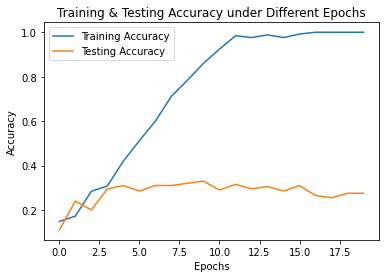

In [ ]:
# Plot the training accuracy and testing accuracy under different epochs

plt.plot(Q2_1_model.history['accuracy'], label='Training Accuracy')
plt.plot(Q2_1_model.history['val_accuracy'], label='Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training & Testing Accuracy under Different Epochs')
plt.legend()
plt.show()

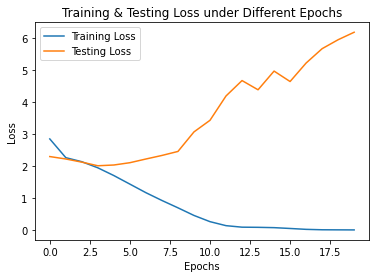

In [ ]:
# Plot the training loss and testing loss under different epochs

plt.plot(Q2_1_model.history['loss'], label='Training Loss')
plt.plot(Q2_1_model.history['val_loss'], label='Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training & Testing Loss under Different Epochs')
plt.legend()
plt.show()

2. Implement the MLP model provided in Q2 in the assignment specificication and use it to classify the given dataset. Plot the training accuracy and testing accuracy under different epochs. Please see the assignment specificication for more details of the training settings.

In [ ]:
# Implement the MLP model in Q2.2

Q2_2_mlp_model = keras.Sequential(
    [
        layers.Input((32,32,3)),               
        layers.Flatten(),                      
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)

Q2_2_mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Same as the CNN in Q2.1, Use “adam” as the optimization algorithm 
# (set learning rate to 0.001, and leave other hyperparameters of Adam fixed at the default for the library you choose to use)
Q2_2_mlp_model.compile (tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Same as the CNN in Q2.1, Set batch size to 32 and epoch to 20
Q2_2_model = Q2_2_mlp_model.fit(train_images_normalized, train_labels_sub, epochs=20, batch_size=32, 
                      validation_data=(test_images_normalized, test_labels_sub))

Epoch 1/20
8/8 [==============================] - 0s 26ms/step - loss: 3.5036 - accuracy: 0.1000 - val_loss: 3.1778 - val_accuracy: 0.1000
Epoch 2/20
8/8 [==============================] - 0s 9ms/step - loss: 2.7844 - accuracy: 0.1520 - val_loss: 2.4183 - val_accuracy: 0.1800
Epoch 3/20
8/8 [==============================] - 0s 9ms/step - loss: 2.2415 - accuracy: 0.2240 - val_loss: 2.1579 - val_accuracy: 0.2550
Epoch 4/20
8/8 [==============================] - 0s 9ms/step - loss: 2.1006 - accuracy: 0.2280 - val_loss: 2.1608 - val_accuracy: 0.2000
Epoch 5/20
8/8 [==============================] - 0s 11ms/step - loss: 2.0175 - accuracy: 0.2680 - val_loss: 2.1053 - val_accuracy: 0.2050
Epoch 6/20
8/8 [==============================] - 0s 9ms/step - loss: 1.9298 - accuracy: 0.3000 - val_loss: 2.1544 - val_accuracy: 0.2250
Epoch 7/20
8/8 [==============================] - 0s 10ms/step - loss: 1.8392 - accuracy: 0.3560 - val_loss: 2.0649 - val_accuracy: 0.2400
Epoch 8/20
8/8 [===============

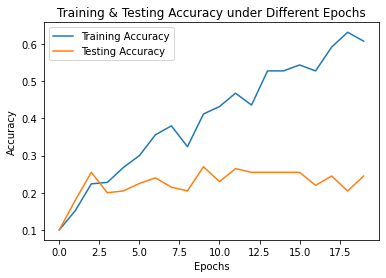

In [ ]:
# Plot the training accuracy and testing accuracy under different epochs

plt.plot(Q2_2_model.history['accuracy'], label='Training Accuracy')
plt.plot(Q2_2_model.history['val_accuracy'], label='Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training & Testing Accuracy under Different Epochs')
plt.legend()
plt.show()

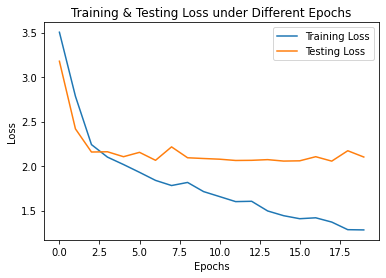

In [ ]:
# Plot the training loss and testing loss under different epochs

plt.plot(Q2_2_model.history['loss'], label='Training Loss')
plt.plot(Q2_2_model.history['val_loss'], label='Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training & Testing Loss under Different Epochs')
plt.legend()
plt.show()

3. To improve the performance of the above MLP, one strategy is to use features of the images as the input of the MLP to improve the performance.  How will you extract the features from the raw images?  Implement the feature extraction and classification on the given dataset, and plot the training accuracy and testing accuracy under different epochs. Please see the assignment specificication for more details of the training settings.

In [ ]:
import cv2

In [ ]:
win_size = (8,8)
block_size = (4,4)
block_stride = (1,1)
cell_size = (2,2)
nbins = 8
win_stride = (4,4)
padding = (1,1)

Q2_3_hog_feature_extraction = cv2.HOGDescriptor(win_size,block_size,block_stride,cell_size,nbins)

extracted_train_image_features = []
for each_train_image_original in train_images_sub:
  # Transform all the images into 8 bit unsigned integer
    each_train_image_original = each_train_image_original.astype(np.uint8)
  # Greyscale all the images
    each_train_image_grey = cv2.cvtColor(each_train_image_original, cv2.COLOR_RGB2GRAY)
  # Apply Hog Computation
    each_train_image_hogged = Q2_3_hog_feature_extraction.compute(each_train_image_grey, win_stride, padding).reshape((-1,))
  # Gather Hogged Imgages together 
    extracted_train_image_features.append(each_train_image_hogged)
    
extracted_test_image_features = []
for each_test_image_original in test_images_sub:
  # Transform all the images into 8 bit unsigned integer
    each_test_image_original = each_test_image_original.astype(np.uint8)
  # Greyscale all the images
    each_test_image_grey = cv2.cvtColor(each_test_image_original, cv2.COLOR_RGB2GRAY)
  # Apply Hog Computation
    each_test_image_hogged = Q2_3_hog_feature_extraction.compute(each_test_image_grey, win_stride, padding).reshape((-1,))
  # Gather Hogged Imgages together 
    extracted_test_image_features.append(each_test_image_hogged)

In [ ]:
# Check the Dimension/Type of the Inputs

# Transform from list to NP Array Type
train_array = np.array(extracted_train_image_features)
# Transform from list to NP Array Type
test_array = np.array(extracted_test_image_features)

# Check the Dimension Size of the Inputs
print("train_array shape:", train_array.shape)
print("train_images shape:", train_images_sub.shape)
print("test_array shape:", test_array.shape)
print("test_images shape:", test_images_sub.shape)

train_array shape: (250, 39200)
train_images shape: (250, 32, 32, 3)
test_array shape: (200, 39200)
test_images shape: (200, 32, 32, 3)


In [ ]:
# Apply the mlp in Q2.2 to the extracted feature training set
Q2_3_mlp_model = keras.Sequential(
    [
        layers.Input((39200)),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)

Q2_3_mlp_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               10035456  
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 10,038,026
Trainable params: 10,038,026
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Same as the CNN in Q2.1, Use “adam” as the optimization algorithm 
# (set learning rate to 0.001, and leave other hyperparameters of Adam fixed at the default for the library you choose to use)
Q2_3_mlp_model.compile (tf.optimizers.Adam(lr=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Same as the CNN in Q2.1, Set batch size to 32 and epoch to 20
Q2_3_model = Q2_3_mlp_model.fit(train_array, train_labels_sub, epochs=20, batch_size=32, 
                      validation_data=(test_array, test_labels_sub))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
8/8 [==============================] - 1s 100ms/step - loss: 6.7125 - accuracy: 0.0920 - val_loss: 4.3813 - val_accuracy: 0.2100
Epoch 2/20
8/8 [==============================] - 1s 81ms/step - loss: 3.3535 - accuracy: 0.3400 - val_loss: 3.2185 - val_accuracy: 0.1550
Epoch 3/20
8/8 [==============================] - 1s 81ms/step - loss: 1.3302 - accuracy: 0.5680 - val_loss: 2.1360 - val_accuracy: 0.2900
Epoch 4/20
8/8 [==============================] - 1s 84ms/step - loss: 0.6138 - accuracy: 0.8480 - val_loss: 2.0871 - val_accuracy: 0.2600
Epoch 5/20
8/8 [==============================] - 1s 81ms/step - loss: 0.3423 - accuracy: 0.9600 - val_loss: 2.0340 - val_accuracy: 0.3050
Epoch 6/20
8/8 [==============================] - 1s 84ms/step - loss: 0.1804 - accuracy: 0.9840 - val_loss: 2.2508 - val_accuracy: 0.3050
Epoch 7/20
8/8 [==============================] - 1s 83ms/step - loss: 0.0934 - accuracy: 1.0000 - val_loss: 2.0959 - val_accuracy: 0.3250
Epoch 8/20
8/8 [==========

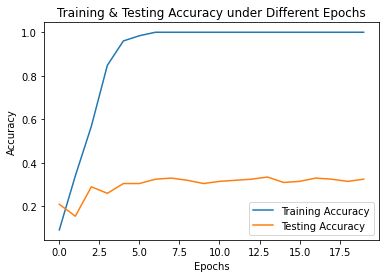

In [ ]:
# Plot the training accuracy and testing accuracy under different epochs
plt.plot(Q2_3_model.history['accuracy'], label='Training Accuracy')
plt.plot(Q2_3_model.history['val_accuracy'], label='Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training & Testing Accuracy under Different Epochs')
plt.legend()
plt.show()

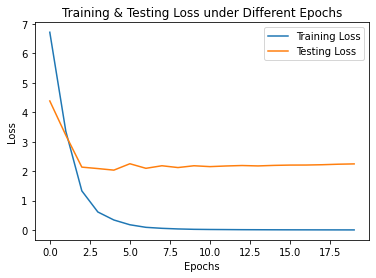

In [ ]:
# Plot the training loss and testing loss under different epochs
plt.plot(Q2_3_model.history['loss'], label='Training Loss')
plt.plot(Q2_3_model.history['val_loss'], label='Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training & Testing Loss under Different Epochs')
plt.legend()
plt.show()

In [ ]:
max(Q2_3_model.history['val_accuracy'])

0.33500000834465027